In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [11]:
data = pd.read_csv('train.csv')

In [12]:
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data['Sex'].replace("male", 0, inplace=True)
data['Sex'].replace("female", 1, inplace=True)

In [39]:
data_selected = data[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']].copy()

In [40]:
data_selected.head()

,Survived,Pclass,Age,Fare,Sex
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


<Axes: >

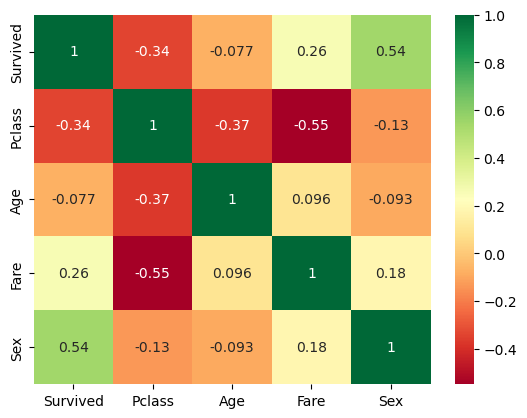

In [41]:
sns.heatmap(data_selected.corr(), annot=True, cmap='RdYlGn')

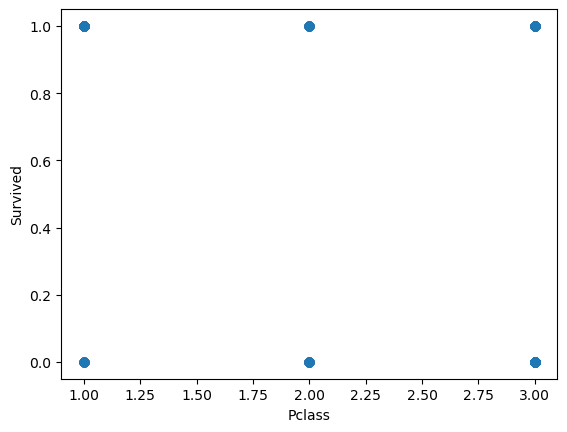

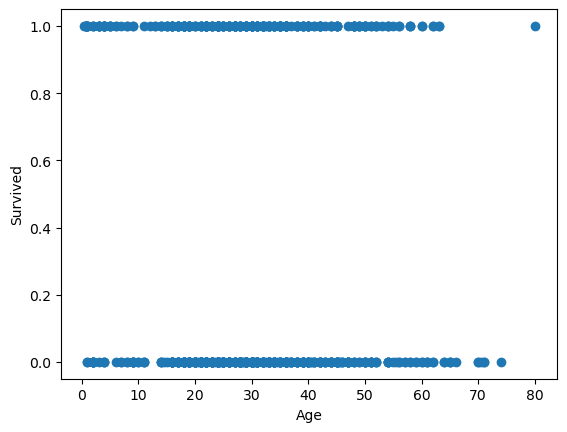

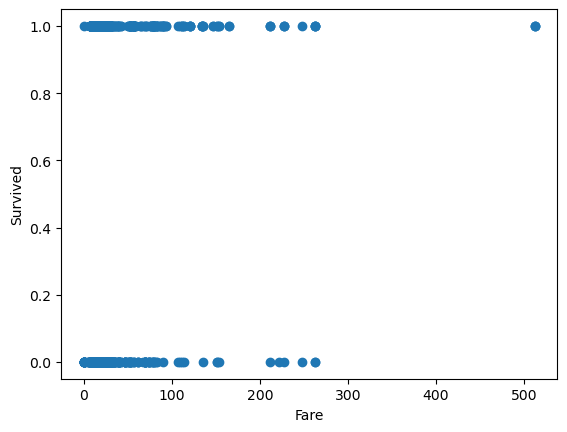

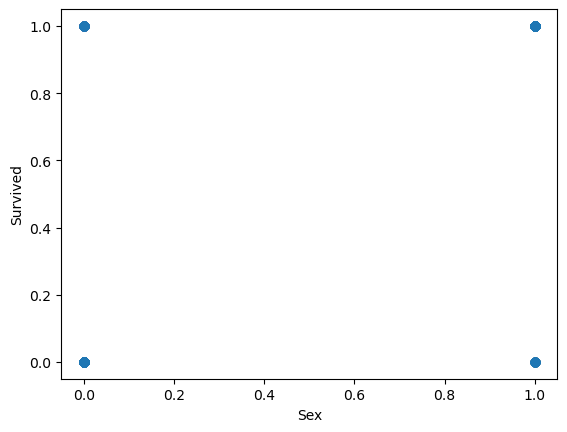

In [42]:
# generate scatter plot for each other column with survived
for col in data_selected.columns:
    if col !=  'Survived':
        plt.scatter(data[col], data['Survived'])
        plt.xlabel(col)
        plt.ylabel('Survived')
        plt.show() 

In [74]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.slope = None
        self.intercept = np.random.randn(1)
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, val):
        return 1 / (1 + np.exp(-val))

    def predict(self, X):
        if self.slope is None:
            self.slope = np.random.randn(X.shape[1])
        z = np.dot(X, self.slope) + self.intercept
        f = self.sigmoid(z)
        return 0 if f < 0.5 else 1

    def fit(self, X, y, plot=False):
        if self.slope is None:
            self.slope = np.random.randn(X.shape[1])
        for epoch in range(self.epochs):
            error = 0
            d_slope = np.zeros_like(self.slope)
            d_intercept = 0

            for i in range(len(X)):
                z_wb = np.dot(X[i], self.slope) + self.intercept
                f_wb = self.sigmoid(z_wb)

                dj_db_i = f_wb - y[i]
                d_intercept += dj_db_i

                for j in range(len(X[0])):
                    d_slope[j] += X[i, j] * dj_db_i

                error -= y[i] * np.log(f_wb) + (1 - y[i]) * np.log(1 - f_wb)

            error = error / len(X)
            d_slope = d_slope / len(X)
            d_intercept = d_intercept / len(X)

            if epoch % 100 == 0:
                print(f"Error at {epoch} epoch is {error}")
                print(f"Slope at {epoch} epoch is {self.slope}")
                print(f"Intercept at {epoch} epoch is {self.intercept}")

                if plot:
                    plt.scatter(X, y)
                    plt.plot(X, self.predict(X), color='red')
                    plt.show()

            self.slope -= self.lr * d_slope
            self.intercept -= self.lr * d_intercept


In [81]:
log = LogisticRegression(lr = 0.001, epochs = 10000)

In [82]:
data_selected.dropna(inplace=True)

In [83]:
X_train = data_selected.drop('Survived', axis = 1).values
y_train = data_selected['Survived'].values

In [84]:
temp_x = X_train[0]

In [85]:
print(temp_x)

[ 3.   22.    7.25  0.  ]


In [86]:
log.fit(X_train, y_train)


/tmp/ipykernel_6803/3742965661.py:39: RuntimeWarning: divide by zero encountered in log
  error -= y[i] * np.log(f_wb) + (1 - y[i]) * np.log(1 - f_wb)
/tmp/ipykernel_6803/3742965661.py:39: RuntimeWarning: invalid value encountered in multiply
  error -= y[i] * np.log(f_wb) + (1 - y[i]) * np.log(1 - f_wb)


Error at 0 epoch is [nan]
Slope at 0 epoch is [ 0.14016249 -0.15666494  1.45922762  0.36983798]
Intercept at 0 epoch is [0.39677007]
Error at 100 epoch is [nan]
Slope at 100 epoch is [ 0.10511904 -0.54025384  0.59011588  0.37107321]
Intercept at 100 epoch is [0.38063684]
Error at 200 epoch is [nan]
Slope at 200 epoch is [ 0.12060605 -0.21672639  0.16260658  0.38016735]
Intercept at 200 epoch is [0.3867174]
Error at 300 epoch is [0.62954488]
Slope at 300 epoch is [ 0.11109804 -0.04874403  0.01453179  0.38809589]
Intercept at 300 epoch is [0.38644138]
Error at 400 epoch is [0.62270432]
Slope at 400 epoch is [ 0.08651462 -0.04661183  0.01410876  0.39519581]
Intercept at 400 epoch is [0.38152796]
Error at 500 epoch is [0.61641035]
Slope at 500 epoch is [ 0.06298411 -0.04488814  0.0138895   0.40235187]
Intercept at 500 epoch is [0.37688974]
Error at 600 epoch is [0.61061607]
Slope at 600 epoch is [ 0.04049602 -0.04325984  0.01368557  0.40956325]
Intercept at 600 epoch is [0.37252598]
Error 

In [87]:
log.predict(temp_x)

0